<a href="https://colab.research.google.com/github/FlavioIBmec/Case-MMZR/blob/main/Case_MMZR_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1

In [1]:
# Importando todas as bibliotecas necessárias para manipulação de dados e visualização
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lendo as bases de dados, a partir do github
df_local = pd.read_excel('https://raw.githubusercontent.com/FlavioIBmec/Case-MMZR/main/retornos_dados_locais.xlsx')
df_offshore = pd.read_excel('https://raw.githubusercontent.com/FlavioIBmec/Case-MMZR/main/retornos_dados_offshore.xlsx')

In [3]:
# --- Limpeza de df_local ---
# Remove as duas primeiras linhas do DataFrame, que contêm informações de cabeçalho redundantes
df_local = df_local.iloc[2:]
# Renomeia as colunas do DataFrame para nomes mais descritivos e padronizados
df_local = df_local.rename(columns={
'Unnamed: 0':'Data',
'Pós-Fixado':'CDI Pós-Fixado',
'Alternativos':'Alternativos - Dólar',
'RV Local':'RV Local - Ibovespa',
'Pré-Fixado':'Pré-Fixado - IDkA Pré 3 Anos',
'Imobiliário':'Imobiliário - IFIX',
'Retorno Absoluto':'Retorno Absoluto - IHFA',
'Inflação Tipo 1':'Inflação IMA-B',
'Inflação Tipo 2':'Inflação IMA-B 5',
'Inflação Tipo 3':'Inflação IMA-B 5+'
})


# --- Limpeza de df_offshore ---
# df_offshore também possui um cabeçalho multi-nível e nomes de ativos 'Retorno' duplicados.
# Remove as duas primeiras linhas do DataFrame, que contêm informações de cabeçalho redundantes
df_offshore = df_offshore.iloc[2:]
# Renomeia a primeira coluna para 'Data' para padronização
df_offshore = df_offshore.rename(columns={df_offshore.columns[0]: 'Data'})

# Converte a coluna 'Data' em ambos os DataFrames para o tipo datetime, facilitando operações baseadas em tempo
df_local['Data'] = pd.to_datetime(df_local['Data'])
df_offshore['Data'] = pd.to_datetime(df_offshore['Data'])

Questão 1-A)

In [4]:
# Realizando o merge das duas bases em uma só chamada 'df'
df = pd.merge(df_local, df_offshore, on='Data', how='inner')
df.head()

,Data,CDI Pós-Fixado,Alternativos - Dólar,RV Local - Ibovespa,Pré-Fixado - IDkA Pré 3 Anos,Imobiliário - IFIX,Retorno Absoluto - IHFA,Inflação IMA-B,Inflação IMA-B 5,Inflação IMA-B 5+,RV Global,RF Global
0,2015-01-02,0.000435,0.013817,-0.029896,0.001178,0.007331,0.002169,0.000884,0.000801,0.00093,0.011759,0.014897
1,2015-01-05,0.000435,0.00661,-0.020531,0.00225,0.004656,0.000445,0.002688,0.001732,0.003221,-0.006756,0.00964
2,2015-01-06,0.000435,-0.003099,0.010186,0.005614,-0.003962,-0.002435,0.008345,0.002112,0.011818,-0.021061,-0.014964
3,2015-01-07,0.000435,-0.007993,0.030458,-0.000729,0.002649,0.001135,-0.001261,0.000457,-0.002209,0.003448,0.001486
4,2015-01-08,0.000435,0.004178,0.009725,0.000273,0.001073,0.001478,0.001211,0.000698,0.001495,0.009438,-0.005401


In [5]:
# Define um dicionário com os pesos de cada ativo na carteira de investimentos
carteira = {"CDI Pós-Fixado":0.315,"Alternativos - Dólar":0.02,"Imobiliário - IFIX":0.05,"RV Global":0.075,
            "RV Local - Ibovespa":0.05,"RF Global":0.1,"Retorno Absoluto - IHFA":0.165,
            "Inflação IMA-B":0.225,"Inflação IMA-B 5":0.225,"Inflação IMA-B 5+":0.225}

# Converter o dicionário 'carteira' para uma Série do Pandas para permitir a multiplicação com 'df.sum()'
weights_series = pd.Series(carteira)

In [6]:
# Define uma lista de ativos considerados 'fixos' na composição da carteira
ativos_fixos = ["CDI Pós-Fixado", "Alternativos - Dólar", "RV Local - Ibovespa", "Imobiliário - IFIX",
                "Retorno Absoluto - IHFA", "RV Global", "RF Global"]
# Define uma lista de ativos considerados 'variáveis', sendo que um deles será selecionado por carteira (neste caso, diferentes tipos de inflação)
ativos_variaveis = ["Inflação IMA-B", "Inflação IMA-B 5", "Inflação IMA-B 5+"]  # um por carteira

Questão 1-B)

In [ ]:
# Define uma função para calcular os retornos dos portfólios com base nos ativos fixos e um ativo variável
def calcula_portfolios(df, weights, ativos_fixos, ativos_variaveis):
    portfolios = {} # Dicionário para armazenar os retornos diários de cada portfólio

    for ativo in ativos_variaveis:
        ativos = ativos_fixos + [ativo]
        # Calcula o retorno diário do portfólio, multiplicando os retornos dos ativos pelos seus respectivos pesos
        portfolios[ativo] = df[ativos] @ weights[ativos]

    return portfolios

# Chama a função para calcular os retornos diários dos portfólios, usando o DataFrame principal e os pesos definidos
portfolios = calcula_portfolios(df,weights_series,ativos_fixos,ativos_variaveis)

print('Portifólio 1')
display(portfolios["Inflação IMA-B"])
print('Portifólio 2')
display(portfolios["Inflação IMA-B 5"])
print('Portifólio 3')
display(portfolios["Inflação IMA-B 5+"])

In [8]:
# Número de dias úteis em um ano, um padrão comum para cálculos financeiros
dias_comerciais = 252

# Número total de observações (dias) no DataFrame de retornos
total_periodo = len(df)

# Calcula o número total de anos de dados, dividindo o número total de dias pelos dias comerciais por ano
num_anos = total_periodo / dias_comerciais

print(f'Tempo total da carteira: {num_anos:.0f} anos')

Tempo total da carteira: 11 anos


Questão 1-C.a)

In [9]:
# Dicionário para armazenar os resultados finais de retorno e retorno anualizado de cada portfólio
resultado_Portifolio = {}

# Loop através dos retornos diários de cada portfólio calculados pela função 'calcula_portfolios'
for nome, valor in portfolios.items():
    retorno_cumulativo = (1 + valor).cumprod() - 1
    # Pega o último valor do retorno cumulativo, que representa o retorno total do período
    retorno_total = retorno_cumulativo.iloc[-1]

    # Calcular Retorno Total Anualizado
    retorno_total_anualizado = (1 + retorno_total)**(dias_comerciais / total_periodo) - 1

    # Armazenar os resultados de retorno total e retorno total anualizado no dicionário
    resultado_Portifolio[nome] = {
        'Retorno Total': retorno_total,
        'Retorno Total Anualizado': retorno_total_anualizado
    }

for data, results in resultado_Portifolio.items():
    print(f"\nResultados para o Portfólio com {data}:")
    print(f"  Retorno Total: {results['Retorno Total'] * 100:.2f}% em {num_anos:.0f} anos")
    print(f"  Retorno Total Anualizado: {results['Retorno Total Anualizado'] * 100:.2f}%")


Resultados para o Portfólio com Inflação IMA-B:
  Retorno Total: 229.43% em 11 anos
  Retorno Total Anualizado: 11.50%

Resultados para o Portfólio com Inflação IMA-B 5:
  Retorno Total: 228.80% em 11 anos
  Retorno Total Anualizado: 11.48%

Resultados para o Portfólio com Inflação IMA-B 5+:
  Retorno Total: 229.44% em 11 anos
  Retorno Total Anualizado: 11.50%


Questão 1-C.b)

In [10]:
# Dicionário para armazenar os resultados de volatilidade (diária e anualizada) de cada portfólio
Volatilidade_portifolio = {}

for nome, retorno_diario in portfolios.items():
    # Calcular Volatilidade Diária: desvio padrão dos retornos diários
    volatilidade_diaria = retorno_diario.std()

    # Calcular Volatilidade Total Anualizada
    # A volatilidade anualizada é a volatilidade diária multiplicada pela raiz quadrada do número de dias comerciais
    volatilidade_anualizada = volatilidade_diaria * (dias_comerciais**0.5)

    # Armazenar os resultados de volatilidade diária e anualizada no dicionário
    Volatilidade_portifolio[nome] = {
        'Volatilidade Diária': volatilidade_diaria,
        'Volatilidade Anualizada': volatilidade_anualizada
    }

for nome, results in Volatilidade_portifolio.items():
    print(f"\nResultados de Volatilidade para o Portfólio com {nome}:")
    print(f"  Volatilidade Diária: {results['Volatilidade Diária'] * 100:.2f}%")
    print(f"  Volatilidade Anualizada: {results['Volatilidade Anualizada'] * 100:.2f}%")


Resultados de Volatilidade para o Portfólio com Inflação IMA-B:
  Volatilidade Diária: 0.22%
  Volatilidade Anualizada: 3.54%

Resultados de Volatilidade para o Portfólio com Inflação IMA-B 5:
  Volatilidade Diária: 0.20%
  Volatilidade Anualizada: 3.12%

Resultados de Volatilidade para o Portfólio com Inflação IMA-B 5+:
  Volatilidade Diária: 0.25%
  Volatilidade Anualizada: 4.02%


Questão 1-C.c)

In [11]:
# Usaremos o CDI Pós-Fixado como proxy para a taxa livre de risco.
cdi_retorno_diario = df['CDI Pós-Fixado']

# Calcula o retorno cumulativo do CDI ao longo do período total
retorno_cumulativo_cdi = (1 + cdi_retorno_diario).cumprod() - 1
retorno_total_cdi = retorno_cumulativo_cdi.iloc[-1]
# Anualiza o retorno cumulativo do CDI usando a fórmula de anualização
taxa_livre_de_risco_anualizada = (1 + retorno_total_cdi)**(dias_comerciais / total_periodo) - 1

print(f"Taxa Livre de Risco Anualizada (CDI Pós-Fixado): {taxa_livre_de_risco_anualizada * 100:.2f}%")

# Dicionário para armazenar os Índices de Sharpe de cada portfólio
indice_sharp = {}

# 2. Calcular o Índice de Sharpe para cada portfólio
for nome_portfolio in resultado_Portifolio.keys():
    # Obter retorno anualizado do portfólio a partir dos resultados previamente calculados
    retorno_anualizado_portifolio = resultado_Portifolio[nome_portfolio]['Retorno Total Anualizado']

    # Obter volatilidade anualizada do portfólio a partir dos resultados previamente calculados
    volatilidade_anualizado_portifolio = Volatilidade_portifolio[nome_portfolio]['Volatilidade Anualizada']

    # Calcular Índice de Sharpe = (Retorno do Portfólio - Taxa Livre de Risco) / Volatilidade do Portfólio

    sharpe = (retorno_anualizado_portifolio - taxa_livre_de_risco_anualizada) / volatilidade_anualizado_portifolio

    indice_sharp[nome_portfolio] = sharpe

# Exibir os resultados do Índice de Sharpe para cada portfólio
print("\n--- Índice de Sharpe para Cada Portfólio ---")
for nome, sharpe_value in indice_sharp.items():
    print(f"  Portfólio com {nome}: {sharpe_value:.2f}")

Taxa Livre de Risco Anualizada (CDI Pós-Fixado): 9.73%

--- Índice de Sharpe para Cada Portfólio ---
  Portfólio com Inflação IMA-B: 0.50
  Portfólio com Inflação IMA-B 5: 0.56
  Portfólio com Inflação IMA-B 5+: 0.44


### Resumo Consolidado das Métricas dos Portfólios

In [13]:
metricas_consolidadas = [] # Lista para armazenar as métricas de cada portfólio

# Itera sobre as chaves (nomes dos portfólios) do dicionário resultado_Portifolio
for i in resultado_Portifolio.keys():
    retornos = resultado_Portifolio[i] # Pega os resultados de retorno para o portfólio atual
    volatilidades = Volatilidade_portifolio[i] # Pega os resultados de volatilidade para o portfólio atual
    sharpe = indice_sharp[i] # Pega o Índice de Sharpe para o portfólio atual

    # Adiciona um dicionário com todas as métricas consolidadas para o portfólio atual à lista
    metricas_consolidadas.append({
        'Portfólio': i,
        'Retorno Total (%)': retornos['Retorno Total'] * 100,
        'Retorno Total Anualizado (%)': retornos['Retorno Total Anualizado'] * 100,
        'Volatilidade Diária (%)': volatilidades['Volatilidade Diária'] * 100,
        'Volatilidade Anualizada (%)': volatilidades['Volatilidade Anualizada'] * 100,
        'Índice de Sharpe': sharpe
    })

# Cria um DataFrame do pandas a partir da lista de métricas consolidadas
metrics_df = pd.DataFrame(metricas_consolidadas)
# Define a coluna 'Portfólio' como índice do DataFrame para melhor organização
metrics_df = metrics_df.set_index('Portfólio')

print("Métricas Consolidadas dos Portfólios:")
# Exibe o DataFrame de métricas, arredondando os valores para duas casas decimais
display(metrics_df.round(2))

Métricas Consolidadas dos Portfólios:


,Retorno Total (%),Retorno Total Anualizado (%),Volatilidade Diária (%),Volatilidade Anualizada (%),Índice de Sharpe
Portfólio,,,,,
Inflação IMA-B,229.43,11.50,0.22,3.54,0.50
Inflação IMA-B 5,228.80,11.48,0.20,3.12,0.56
Inflação IMA-B 5+,229.44,11.50,0.25,4.02,0.44


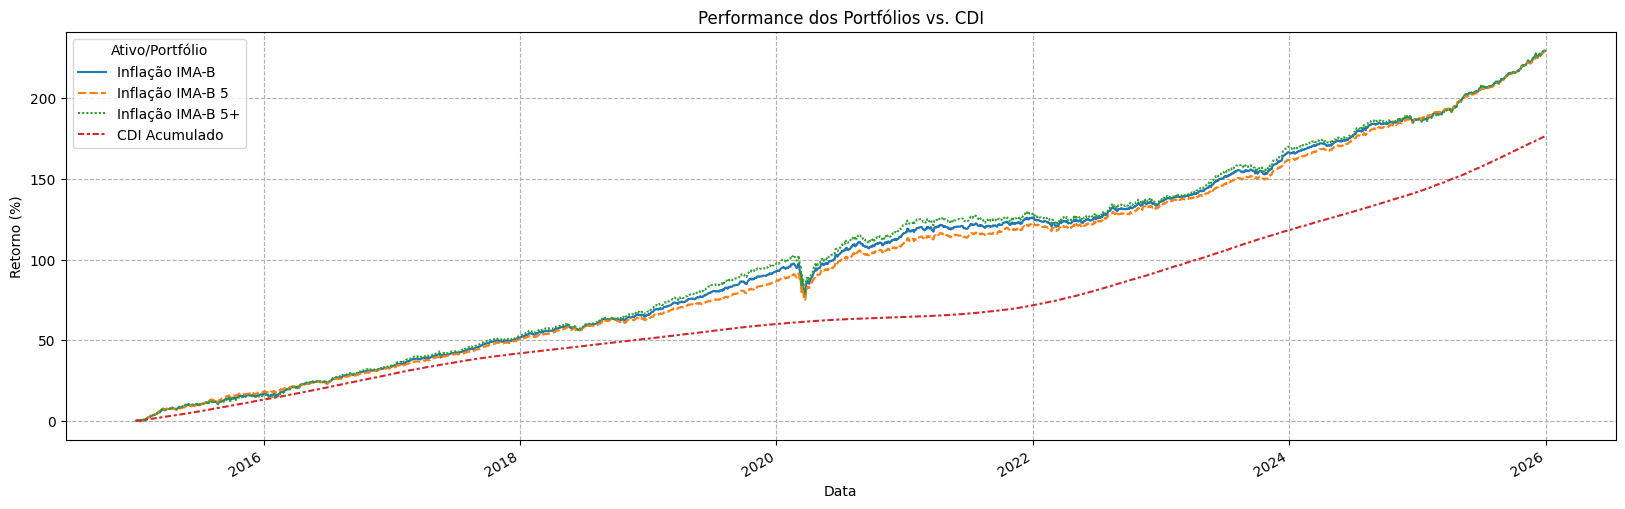

In [14]:
# Cria um DataFrame vazio com o mesmo índice do DataFrame original (df) para armazenar os retornos acumulados
performance_data = pd.DataFrame(index=df.index)

# Itera sobre cada portfólio e seus retornos diários
for nome, valor in portfolios.items():
    performance_data[nome] = (1 + valor).cumprod() - 1

# cdi_retorno_diario já está definido como df['CDI Pós-Fixado']
performance_data['CDI Acumulado'] = retorno_cumulativo_cdi
# Adiciona a coluna 'Data' ao DataFrame performance_data
performance_data['Data'] = df['Data']
# Define a coluna 'Data' como o índice do DataFrame para que o seaborn a use como eixo x
performance_data = performance_data.set_index('Data')

# Plotar a performance acumulada dos portfólios e do CDI
plt.figure(figsize=(20,6)) # Define o tamanho da figura para o gráfico
sns.lineplot(data=performance_data * 100) # Multiplica apenas os dados numéricos por 100 e plota as linhas

plt.title('Performance dos Portfólios vs. CDI')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.grid(True, linestyle='--')
plt.legend(title='Ativo/Portfólio')
plt.gcf().autofmt_xdate() # Ajusta automaticamente a formatação das datas no eixo X
plt.show()